In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import re
import numpy as np

from fitter import Fitter, get_common_distributions, get_distributions
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_friedman3, make_s_curve
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

from tqdm import tqdm
import math

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

#Multilabel Stratified K Fold Creation
#pip install iterative-stratification
import sys
sys.path.append('../input/iterative-stratification/iterative-stratification-master')
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [2]:
# Run in local
# Fold index
fold = 1

X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")

In [3]:
acc_list = []
auc_list = []

## Fuzzy Cognitive Map

In [4]:
from numpy import genfromtxt
y_train_pred_fcm = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_pred_fcm.csv", delimiter=',')
y_test_pred_fcm = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_pred_fcm.csv", delimiter=',')
fcm_pred_class_train = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\fcm_pred_class_train.csv", delimiter=',')
fcm_pred_class_test = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\fcm_pred_class_test.csv", delimiter=',')

<AxesSubplot:>

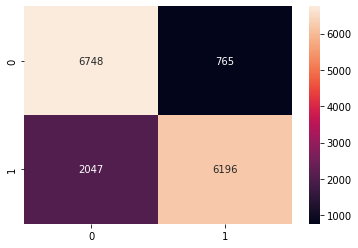

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, fcm_pred_class_train)
sns.heatmap(confusion_matrix(y_train, fcm_pred_class_train), annot=True,fmt='d')

In [6]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,fcm_pred_class_train))
print("Recall Score: ",recall_score(y_train, fcm_pred_class_train))
print("F1 Score: ",f1_score(y_train, fcm_pred_class_train))
print("Accuracy Score: ",accuracy_score(y_train, fcm_pred_class_train))

ValueError: Found input variables with inconsistent numbers of samples: [15756, 1751]

#### Evaluating on Test set 

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

print("Precision Score: ",precision_score(y_test, fcm_pred_class_test))
print("Recall Score: ",recall_score(y_test, fcm_pred_class_test))
print("F1 Score: ",f1_score(y_test, fcm_pred_class_test))
print("Accuracy Score: ",accuracy_score(y_test, fcm_pred_class_test))

In [ ]:
#calculate AUC of model
from sklearn import metrics
auc_fcm = metrics.roc_auc_score(y_test, y_test_pred_fcm)
print(auc_fcm)

In [ ]:
acc_list.append(metrics.accuracy_score(y_test, Predicted_classes))
auc_list.append(auc_fcm)

## Decision Tree 

In [ ]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train.values.ravel())

In [ ]:
#Predict the response for train dataset
y_train_pred_dt = dt_clf.predict(X_train)

print("Decision Tree score: ",dt_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_dt)
sns.heatmap(confusion_matrix(y_train, y_train_pred_dt), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_dt))
print("Recall Score: ",recall_score(y_train, y_train_pred_dt))
print("F1 Score: ",f1_score(y_train, y_train_pred_dt))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_dt))

#### Evaluating on Test set 

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_dt = dt_clf.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_dt))
print("Recall Score: ",recall_score(y_test, y_test_pred_dt))
print("F1 Score: ",f1_score(y_test, y_test_pred_dt))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_dt))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_dt = metrics.roc_auc_score(y_test, y_test_pred_dt)
print(auc_dt)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_dt))
auc_list.append(auc_dt)

## Artificial Neural Network

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

In [ ]:
#Predict the response for train dataset
y_train_pred_ann = model.predict(X_train)

print("Artificial Neural Network score: ",model.evaluate(X_train, y_train))

In [ ]:

history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X_train) # prob of successes (survival)
np.round(model.predict(X_train),0) # 1 and 0 (survival or not)
y_train # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_train),0)

# confusion matrix
print(confusion_matrix(y_train, preds)) # order matters! (actual, predicted)

print(classification_report(y_train, preds))

#### Evaluating on Test set

In [ ]:
# see how these are numbers between 0 and 1? 
model.predict(X_test) # prob of successes (survival)
np.round(model.predict(X_test),0) # 1 and 0 (survival or not)
y_test # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

print(classification_report(y_test, preds))

In [ ]:
#calculate AUC of model
from sklearn import metrics
auc_ann = metrics.roc_auc_score(y_test, model.predict(X_test))
print(auc_ann)

In [ ]:
acc_list.append(metrics.accuracy_score(y_test, preds))
auc_list.append(metrics.roc_auc_score(y_test, model.predict(X_test)))

## Support Vector Machine

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train.values.ravel())

In [ ]:
#Predict the response for train dataset
y_train_pred_svm = svm_clf.predict(X_train)

print("Support Vector Machine score: ",svm_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_svm)
sns.heatmap(confusion_matrix(y_train, y_train_pred_svm), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_svm))
print("Recall Score: ",recall_score(y_train, y_train_pred_svm))
print("F1 Score: ",f1_score(y_train, y_train_pred_svm))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_svm))

#### Evaluating on Test set


In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_svm = svm_clf.predict(X_test)
#y_test_pred_sgd = sgd_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_svm))
print("Recall Score: ",recall_score(y_test, y_test_pred_svm))
print("F1 Score: ",f1_score(y_test, y_test_pred_svm))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_svm))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_svm = metrics.roc_auc_score(y_test, y_test_pred_svm)
print(auc_svm)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_svm))
auc_list.append(auc_svm)

## Gaussian Naive Bayes Classifier

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train.values.ravel())

#### Evaluating on Training Set

In [ ]:
#Predict the response for train dataset
y_train_pred_nb = nb_clf.predict(X_train)

print("Naive Bayes score: ",nb_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_nb)
sns.heatmap(confusion_matrix(y_train, y_train_pred_nb), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_nb))
print("Recall Score: ",recall_score(y_train, y_train_pred_nb))
print("F1 Score: ",f1_score(y_train, y_train_pred_nb))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_nb))

### Fine Tuning for Gaussian Naive Bayes

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

NB_distribution = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_clf = GaussianNB()       

rnd_search_nb = RandomizedSearchCV(nb_clf, param_distributions = NB_distribution, random_state = 42) 
rnd_search_nb.fit(X_train, y_train.values.ravel()) 

In [ ]:
cvres = pd.DataFrame(rnd_search_nb.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_nb.best_estimator_

#### Evaluating on Test set

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
#y_test_pred_nb = nb_clf.predict(X_test)
y_test_pred_nb = rnd_search_nb.best_estimator_.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_nb))
print("Recall Score: ",recall_score(y_test, y_test_pred_nb))
print("F1 Score: ",f1_score(y_test, y_test_pred_nb))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_nb))

In [ ]:
#calculate AUC of model
from sklearn import metrics
auc_nb = metrics.roc_auc_score(y_test, y_test_pred_nb)
print(auc_nb)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_nb))
auc_list.append(auc_nb)

## Stochastic Gradient Descent

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train.values.ravel())

#### Evaluating on Train set

In [ ]:
#Predict the response for train dataset
y_train_pred_sgd = sgd_clf.predict(X_train)
print("Stochastic Gradient Descent Classifier score: ",sgd_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_sgd)
sns.heatmap(confusion_matrix(y_train, y_train_pred_sgd), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_sgd))
print("Recall Score: ",recall_score(y_train, y_train_pred_sgd))
print("F1 Score: ",f1_score(y_train, y_train_pred_sgd))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_sgd))

### Fine Tuning for Stochastic Gradient Descent

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

param_distribs = {
        "average": [True, False],
        "loss":['hinge', 'log_loss', 'modified_huber', 'squared_hinge',  'perceptron'],
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        "learning_rate":['constant', 'optimal', 'invscaling', 'adaptive'],
        "class_weight":[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
        "eta0":[1, 10, 100],
        "penalty":['l2', 'l1', 'elasticnet']
    }
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
rnd_search_SGD = RandomizedSearchCV(sgd_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_SGD.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(rnd_search_SGD.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_SGD.best_estimator_

#### Evaluating on Test set

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_sgd = rnd_search_SGD.best_estimator_.predict(X_test)
#y_test_pred_sgd = sgd_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_sgd))
print("Recall Score: ",recall_score(y_test, y_test_pred_sgd))
print("F1 Score: ",f1_score(y_test, y_test_pred_sgd))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_sgd))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_sgd = metrics.roc_auc_score(y_test, y_test_pred_sgd)
print(auc_sgd)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_sgd))
auc_list.append(auc_sgd)

## Logistic Regression

In [ ]:
%%time
#logistic regression for targets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_predict

log_clf = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=42)
log_clf.fit(X_train, y_train.values.ravel())

#### Evaluating on Train set

In [ ]:
#Predict the response for train dataset
y_train_pred_log = log_clf.predict(X_train)
print("Logistic Regression score: ",log_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_train, y_train_pred_log)
sns.heatmap(confusion_matrix(y_train, y_train_pred_log), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_log))
print("Recall Score: ",recall_score(y_train, y_train_pred_log))
print("F1 Score: ",f1_score(y_train, y_train_pred_log))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_log))

### Fine Tuning for Logistic Regression

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=42)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2'],
                     solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
rnd_search_LR = RandomizedSearchCV(logistic, distributions, random_state=42)
rnd_search_LR.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(rnd_search_LR.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_LR.best_estimator_

#### Evaluating on Test set

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_log = rnd_search_LR.best_estimator_.predict(X_test)
#y_test_pred_log = log_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_log))
print("Recall Score: ",recall_score(y_test, y_test_pred_log))
print("F1 Score: ",f1_score(y_test, y_test_pred_log))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_log))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_log)
#calculate AUC of model
auc_log = metrics.roc_auc_score(y_test, y_test_pred_log)
print(auc_log)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_log))
auc_list.append(auc_log)

## XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
%%time
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train.values.ravel())

#### Evaluating on Train set

In [ ]:
#Predict the response for train dataset
y_train_pred_xgb = xgb_classifier.predict(X_train)
print("XGBoost score: ",xgb_classifier.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_train, y_train_pred_xgb)
sns.heatmap(confusion_matrix(y_train, y_train_pred_xgb), annot=True,fmt='d')


In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_xgb))
print("Recall Score: ",recall_score(y_train, y_train_pred_xgb))
print("F1 Score: ",f1_score(y_train, y_train_pred_xgb))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_xgb))

#### Fine Tuning for XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

xgb_classifier = XGBClassifier(random_state=42)

XG_distributions = dict(n_estimators=[100,200,300,400,500,600,700,800, 900, 1000],
                     max_depths = [2, 5, 10, 20],
                     learning_rate=[0.1,0.15,0.2,0.25,0.3],
                     colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1],
                     subsample=[0.5,0.6,0.7,0.8,0.9,1],
                     grow_policy = ['depthwise', 'lossguide'],
                     booster = ['gbtree', 'gblinear', 'dart'],
                     sampling_method = ['uniform','gradient_based'])
rnd_search_XG = RandomizedSearchCV(xgb_classifier, XG_distributions, random_state=42)
rnd_search_XG.fit(X_train, y_train)

In [ ]:
cvres = pd.DataFrame(rnd_search_XG.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_XG.best_estimator_

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [ ]:
y_test_pred_xgb = rnd_search_XG.best_estimator_.predict(X_test)

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot=True,fmt='d')

In [ ]:
#Performance measures for test dataset
from sklearn.metrics import precision_score, recall_score,f1_score 
print("Precision Score: ",precision_score(y_test, y_test_pred_xgb))
print("Recall Score: ",recall_score(y_test, y_test_pred_xgb))
print("F1 Score: ",f1_score(y_test, y_test_pred_xgb))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_xgb))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_xgb)
#calculate AUC of model
auc_xgb = metrics.roc_auc_score(y_test, y_test_pred_xgb)
print(auc_xgb)


In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_xgb))
auc_list.append(auc_xgb)

## Draw ROC curve and PR curve

### For Training Set

In [ ]:
from sklearn.metrics import roc_curve

#Fuzzy Cognitive Map
fpr_FCM, tpr_FCM, thresholds_FCM = roc_curve(y_train, y_train_pred_fcm)

#------------------------------------------------------------------------------------------------#

#Decision Tree
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_train, y_train_pred_dt)

#------------------------------------------------------------------------------------------------#

#Artificial Neural Network
fpr_ANN, tpr_ANN, thresholds_ANN = roc_curve(y_train, model.predict(X_train))

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_train,  y_train_pred_svm)

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_train, y_train_pred_sgd)

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_train, y_train_pred_nb)

#------------------------------------------------------------------------------------------------#

# Linear Regresison
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_train, y_train_pred_log)

#------------------------------------------------------------------------------------------------#

# XGBoost
fpr_XG, tpr_XG, thresholds_XG = roc_curve(y_train, y_train_pred_xgb)

In [ ]:
plt.figure(figsize=(12, 10))              

#Fuzzy Cognitive Map
plt.plot(fpr_FCM, tpr_FCM, linewidth=2, label="Fuzzy Cognitive Map")

#------------------------------------------------------------------------------------------------#

#Decision Tree
plt.plot(fpr_DT, tpr_DT, linewidth=2, label="Decision Tree")

#------------------------------------------------------------------------------------------------#

#Artificial Neural Network
plt.plot(fpr_ANN, tpr_ANN, linewidth=2, label="Artificial Neural Network")

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
plt.plot(fpr_SVM, tpr_SVM, linewidth=2, label="Support Vector Machine")

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
plt.plot(fpr_SGD, tpr_SGD, linewidth=2, label="Stochastic Gradient Descent")

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
plt.plot(fpr_NB, tpr_NB, "m-", linewidth=2, label="Gaussian Naive Bayes")

#------------------------------------------------------------------------------------------------#

# Linear Regresison
plt.plot(fpr_LR, tpr_LR, linewidth=2, label="Logistic Regression")

#------------------------------------------------------------------------------------------------#

# XGBoost
plt.plot(fpr_XG, tpr_XG, linewidth=2, label="XGBoost")

#------------------------------------------------------------------------------------------------#


# fpr_SGD_90 = fpr_SGD[np.argmax(tpr_SGD >= 0.9)]           

# plt.plot([fpr_SGD_90, fpr_SGD_90], [0., 0.9], "r:")
# plt.plot([0.0, fpr_SGD_90], [0.9, 0.9], "r:")  
# plt.plot([fpr_SGD_90], [0.9], "ro")   

# AUC curve
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])



plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)

plt.legend(loc=4)
plt.grid(True)      
plt.show()

### For Test Set

In [ ]:
from sklearn.metrics import roc_curve

#Fuzzy Cognitive Map
fpr_FCM, tpr_FCM, thresholds_FCM = roc_curve(y_test, y_test_pred_fcm)

#------------------------------------------------------------------------------------------------#

#Decision Tree
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_test_pred_dt)

#------------------------------------------------------------------------------------------------#

#Artificial Neural Network
fpr_ANN, tpr_ANN, thresholds_ANN = roc_curve(y_test, model.predict(X_test))

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_test_pred_svm)

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_test, y_test_pred_sgd)

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, y_test_pred_nb)

#------------------------------------------------------------------------------------------------#

# Linear Regresison
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_test_pred_log)

#------------------------------------------------------------------------------------------------#

# XGBoost
fpr_XG, tpr_XG, thresholds_XG = roc_curve(y_test, y_test_pred_xgb)

In [ ]:
plt.figure(figsize=(12, 10))                                    

#Fuzzy Cognitive Map
plt.plot(fpr_FCM, tpr_FCM, linewidth=2, label="Fuzzy Cognitive Map")


#------------------------------------------------------------------------------------------------#

#Decision Tree
plt.plot(fpr_DT, tpr_DT, linewidth=2, label="Decision Tree")

#------------------------------------------------------------------------------------------------#

#Artificial Neural Network
plt.plot(fpr_ANN, tpr_ANN, linewidth=2, label="Artificial Neural Network")


#------------------------------------------------------------------------------------------------#

#Support Vector Machine
plt.plot(fpr_SVM, tpr_SVM, linewidth=2, label="Support Vector Machine")


#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
plt.plot(fpr_SGD, tpr_SGD, linewidth=2, label="Stochastic Gradient Descent")


#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
plt.plot(fpr_NB, tpr_NB, "m-", linewidth=2, label="Gaussian Naive Bayes")

#------------------------------------------------------------------------------------------------#

# Linear Regresison
plt.plot(fpr_LR, tpr_LR, linewidth=2, label="Logistic Regression")


#------------------------------------------------------------------------------------------------#

# XGBoost
plt.plot(fpr_XG, tpr_XG, linewidth=2, label="XGBoost")

#------------------------------------------------------------------------------------------------#


# fpr_SGD_90 = fpr_SGD[np.argmax(tpr_SGD >= 0.9)]           

# plt.plot([fpr_SGD_90, fpr_SGD_90], [0., 0.9], "r:")
# plt.plot([0.0, fpr_SGD_90], [0.9, 0.9], "r:")  
# plt.plot([fpr_SGD_90], [0.9], "ro")   

# AUC curve
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])



plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)

plt.legend(loc=4)
plt.grid(True)      
plt.show()

## The area under curve (AUC)
Through AUC you can summarize the performance of each classifier into a single measure when comparing different classifiers. Calculating the area under the ROC curve, abbreviated as AUC, is a typical method.


In [ ]:
model_list = ['Fuzzy Cognitive Map', 'Decision Tree', 'Artificial Neural Network', 'Support Vector Machine', 'Stochastic Gradient Descent', 'Gaussian Naive Bayes', 'Logistic Regression', 'XGBoost']

#accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df